In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# Reading the dataset
accidents = pd.read_csv(r"C:\Users\maria\Videos\Motor_Vehicle_Collisions_-_Crashes_2.csv")

In [3]:
print(f"The dataset has {accidents.shape[1]} columns and {accidents.shape[0]} rows")

The dataset has 29 columns and 1048575 rows


In [4]:
for col in accidents.columns:
    print(f"Column: {col:35} | type{str(accidents[col].dtype):7}| missing values: {accidents[col].isna().sum():3d}")

Column: CRASH DATE                          | typeobject | missing values:   0
Column: CRASH TIME                          | typeobject | missing values:   0
Column: BOROUGH                             | typeobject | missing values: 376665
Column: ZIP CODE                            | typefloat64| missing values: 376849
Column: LATITUDE                            | typefloat64| missing values: 74793
Column: LONGITUDE                           | typefloat64| missing values: 74793
Column: LOCATION                            | typeobject | missing values: 74793
Column: ON STREET NAME                      | typeobject | missing values: 257012
Column: CROSS STREET NAME                   | typeobject | missing values: 542996
Column: OFF STREET NAME                     | typeobject | missing values: 792891
Column: NUMBER OF PERSONS INJURED           | typefloat64| missing values:  17
Column: NUMBER OF PERSONS KILLED            | typefloat64| missing values:  30
Column: NUMBER OF PEDESTRIANS I

In [5]:
# Dropping columns that might be irrelevant to the EDA
accidents.drop(columns=['ZIP CODE' ,'LATITUDE','LONGITUDE','CROSS STREET NAME','OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'], inplace=True)
accidents

,CRASH DATE,CRASH TIME,BOROUGH,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,9/11/2021,2:39,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,3/26/2022,11:45,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,6/29/2022,6:55,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,9/11/2021,9:35,BROOKLYN,"(40.667202, -73.8665)",NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,"(40.683304, -73.917274)",SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9/2/2016,13:00,NaN,"(40.681446, -73.94644)",MARCY AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,3512130,Sedan,Sedan
1048571,9/4/2016,5:00,NaN,"(40.810333, -73.95364)",WEST 124 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3513248,Taxi,Sedan
1048572,9/10/2016,18:39,MANHATTAN,"(40.74649, -74.001335)",WEST 23 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,3517244,Station Wagon/Sport Utility Vehicle,Sedan
1048573,8/22/2016,15:30,QUEENS,"(40.665504, -73.85612)",153 AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3505598,Convertible,Station Wagon/Sport Utility Vehicle


In [6]:
for col in accidents.columns:
    print(f"Column: {col:35} | type{str(accidents[col].dtype):7}| missing values: {accidents[col].isna().sum():3d}")

Column: CRASH DATE                          | typeobject | missing values:   0
Column: CRASH TIME                          | typeobject | missing values:   0
Column: BOROUGH                             | typeobject | missing values: 376665
Column: LOCATION                            | typeobject | missing values: 74793
Column: ON STREET NAME                      | typeobject | missing values: 257012
Column: NUMBER OF PERSONS INJURED           | typefloat64| missing values:  17
Column: NUMBER OF PERSONS KILLED            | typefloat64| missing values:  30
Column: NUMBER OF PEDESTRIANS INJURED       | typeint64  | missing values:   0
Column: NUMBER OF PEDESTRIANS KILLED        | typeint64  | missing values:   0
Column: NUMBER OF CYCLIST INJURED           | typeint64  | missing values:   0
Column: NUMBER OF CYCLIST KILLED            | typeint64  | missing values:   0
Column: NUMBER OF MOTORIST INJURED          | typeint64  | missing values:   0
Column: NUMBER OF MOTORIST KILLED           

In [7]:
# Dropping null values
accidents.dropna(subset=['CRASH TIME','BOROUGH', 'LOCATION','ON STREET NAME', 'NUMBER OF PERSONS INJURED', 'COLLISION_ID', 'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2'\
    , 'VEHICLE TYPE CODE 2'], inplace = True)
accidents.shape

(318165, 18)

In [64]:
mapping = (accidents.query('BOROUGH != "Nan"')
             .drop_duplicates('COLLISION_ID')
             .set_index('COLLISION_ID')
             .BOROUGH)
mapping

COLLISION_ID
4486519        MANHATTAN
4487127           QUEENS
4486635           QUEENS
4487040            BRONX
4487001    STATEN ISLAND
               ...      
3516457    STATEN ISLAND
3504528            BRONX
3507312        MANHATTAN
3517244        MANHATTAN
3505598           QUEENS
Name: BOROUGH, Length: 318165, dtype: object

In [65]:
accidents['BOROUGH'] = accidents['COLLISION_ID'].map(mapping).fillna('Nan')

In [67]:
# Change the date and time to the apporiate data types
accidents['CRASH DATE'] = pd.to_datetime(accidents['CRASH DATE'])

In [9]:
# Changing persons injured and person killed to the appporiate data types
accidents['NUMBER OF PERSONS INJURED'] = accidents['NUMBER OF PERSONS INJURED'].apply(np.int64)
accidents['NUMBER OF PERSONS KILLED'] = accidents['NUMBER OF PERSONS KILLED'].apply(np.int64)

In [10]:
# it was observed after accudents['VEHICLE TYPE CODE 1'].value_counts that there were rows of data that were referring to the same
# Example {'AMBUL', 'AMBULANCE', 'ambul', 'Ambulance' etc}
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(dict.fromkeys(['AMBULANCE','ambul','AMBUL','Ambulance'], 'Ambulance'))
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(dict.fromkeys(['TRAIL','Trail','trail','Trailer'], 'Trailer'))
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(dict.fromkeys(['4 dr sedan','3-Door','Sedan'], 'Sedan'))
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(dict.fromkeys(['Fire','FIRE','FIRE TRUCK'], 'FIRE TRUCK'))
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(['LIMO'], 'Limosine')
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(['E-Sco'], 'E-Scooter')
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(['van'], 'Van')
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(['MOPED'], 'Moped')
accidents[['VEHICLE TYPE CODE 1']] = accidents[['VEHICLE TYPE CODE 1']].replace(['DUMP'], 'Dump')


In [11]:
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(dict.fromkeys(['AMBULANCE','ambul','AMBUL','Ambulance'], 'Ambulance'))
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(dict.fromkeys(['TRAIL','Trail','trail','Trailer'], 'Trailer'))
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(dict.fromkeys(['4 dr sedan','3-Door','Sedan'], 'Sedan'))
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(dict.fromkeys(['Fire','FIRE','FIRE TRUCK'], 'FIRE TRUCK'))
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(['LIMO'], 'Limosine')
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(['E-Sco'], 'E-Scooter')
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(['van'], 'Van')
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(['MOPED'], 'Moped')
accidents[['VEHICLE TYPE CODE 2']] = accidents[['VEHICLE TYPE CODE 2']].replace(['DUMP'], 'Dump')

In [12]:
# Dropping columns whose value_counts are less than 5
res = accidents
for col in accidents.columns:
    if len(accidents['VEHICLE TYPE CODE 1'].unique()) == 1:
        res = res.drop(col,axis=1)

In [13]:
for col in accidents.columns:
    if len(accidents['VEHICLE TYPE CODE 2'].unique()) == 1:
        res = res.drop(col,axis=1)

In [68]:
res

,CRASH DATE,CRASH TIME,BOROUGH,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH HOUR,YEAR,MONTH,DAY_OF_WEEK,Time_groups,PEDESTRIANS VICTIMS,CYCLIST VICTIMS,MOTORIST VICTIMS
9,2021-12-14,14:58,MANHATTAN,"(40.75144, -73.97397)",3 AVENUE,0,0,0,0,0,...,Sedan,Station Wagon/Sport Utility Vehicle,14,2021,December,Tuesday,Office Hours,0,0,0
11,2021-12-14,16:50,QUEENS,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,0,0,0,0,0,...,Sedan,Station Wagon/Sport Utility Vehicle,16,2021,December,Tuesday,Afternoon rush,0,0,0
14,2021-12-14,23:10,QUEENS,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,2,0,0,0,0,...,Sedan,Sedan,23,2021,December,Tuesday,Evening/Night Time,0,0,2
18,2021-12-11,19:43,BRONX,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,1,0,0,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,19,2021,December,Saturday,Evening/Night Time,0,0,1
24,2021-12-13,17:40,STATEN ISLAND,"(40.63165, -74.08762)",VICTORY BOULEVARD,1,0,0,0,0,...,Sedan,Sedan,17,2021,December,Monday,Afternoon rush,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048565,2016-09-06,23:20,STATEN ISLAND,"(40.629852, -74.12107)",DELAFIELD AVENUE,0,0,0,0,0,...,Sedan,Sedan,23,2016,September,Tuesday,Evening/Night Time,0,0,0
1048566,2016-08-21,13:28,BRONX,"(40.8385, -73.90598)",WEBSTER AVENUE,0,0,0,0,0,...,Sedan,Sedan,13,2016,August,Sunday,Office Hours,0,0,0
1048568,2016-08-25,0:00,MANHATTAN,"(40.757698, -73.9694)",EAST 53 STREET,0,0,0,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,0,2016,August,Thursday,Midnight (23-5),0,0,0
1048572,2016-09-10,18:39,MANHATTAN,"(40.74649, -74.001335)",WEST 23 STREET,0,0,0,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,18,2016,September,Saturday,Afternoon rush,0,0,0


In [14]:
# Creating new date/time columns
accidents['CRASH HOUR'] = accidents['CRASH TIME'].str[0:2]
accidents['YEAR'] = accidents['CRASH DATE'].dt.year 
accidents['MONTH'] = accidents['CRASH DATE'].dt.month_name(locale = 'english')
accidents['DAY_OF_WEEK'] = accidents['CRASH DATE'].dt.day_name()

In [15]:
accidents['CRASH HOUR'] = accidents['CRASH HOUR'].str.replace(':', '')

In [16]:
accidents['CRASH HOUR'] = accidents['CRASH HOUR'].apply(np.int64)

In [17]:
# function to group the hour of the day
def day_time_groups(hour):
    if hour >= 5 and hour < 9:
        return 'Morning'
    elif hour >= 9 and hour < 15:
        return 'Office Hours'
    elif hour >= 15 and hour < 19:
        return 'Afternoon rush'
    elif hour >= 19 and hour <=23:
        return 'Evening/Night Time'
    else:
        return 'Midnight (23-5)'
accidents['Time_groups'] = accidents['CRASH HOUR'].apply(day_time_groups)
accidents[['CRASH TIME', 'CRASH HOUR', 'Time_groups']].head(10)

,CRASH TIME,CRASH HOUR,Time_groups
9,14:58,14,Office Hours
11,16:50,16,Afternoon rush
14,23:10,23,Evening/Night Time
18,19:43,19,Evening/Night Time
24,17:40,17,Afternoon rush
27,12:54,12,Office Hours
28,17:15,17,Afternoon rush
45,21:40,21,Evening/Night Time
51,15:35,15,Afternoon rush
52,12:00,12,Office Hours


In [18]:
accidents['NUMBER OF MOTORIST KILLED'] = accidents['NUMBER OF MOTORIST KILLED'].apply(np.int64)

In [19]:
# making new pedestrian columns by adding killed and injured
accidents['PEDESTRIANS VICTIMS'] = accidents['NUMBER OF PEDESTRIANS INJURED'] + accidents['NUMBER OF PEDESTRIANS KILLED']
accidents['CYCLIST VICTIMS'] = accidents['NUMBER OF CYCLIST INJURED'] + accidents['NUMBER OF CYCLIST KILLED']
accidents['MOTORIST VICTIMS'] = accidents['NUMBER OF MOTORIST INJURED'] + accidents['NUMBER OF MOTORIST KILLED']

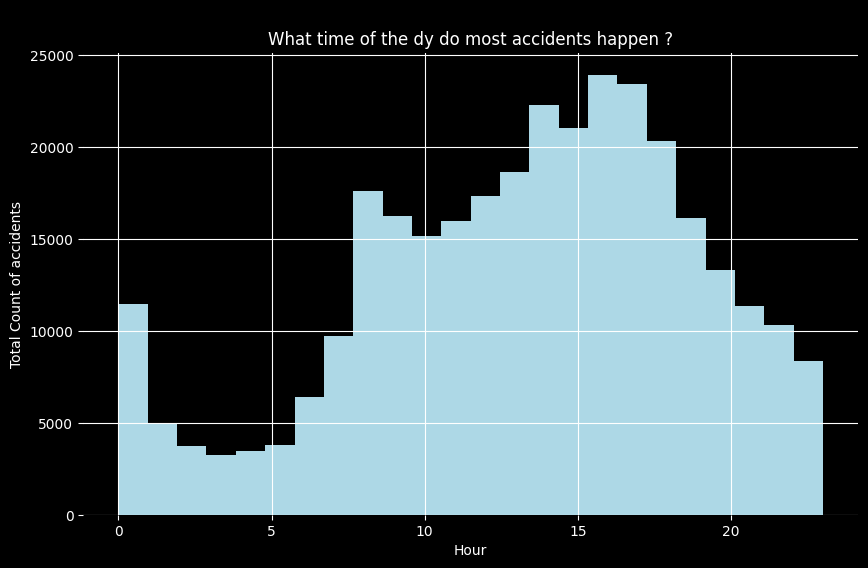

In [20]:
# When is the best time to go out
fig, ax = plt.subplots(figsize = (10,6))
accidents['CRASH HOUR'].hist(bins = 24, ax = ax, color = 'lightblue')
ax.set_title('\nWhat time of the dy do most accidents happen ?')
ax.set(xlabel = 'Hour', ylabel = 'Total Count of accidents')
sns.despine(right = True, left = True, top = True, bottom = True)

In [21]:
# How many accidents happen at each time quarter group
day_time = ['Midnight (23-5)', 'Morning', 'Office Hours', 'Afternoon rush', 'Evening/Night Time']
day_time_accidents = accidents.groupby('Time_groups').size().reindex(day_time)
day_time_accidents

Time_groups
Midnight (23-5)        26850
Morning                37547
Office Hours          105576
Afternoon rush         88669
Evening/Night Time     59523
dtype: int64

In [22]:
# Average Accidents per Hour
hourly = accidents.set_index('CRASH DATE').resample('H')['COLLISION_ID'].size().reset_index()
hourly.columns = ['Date', 'Count']
hourly['Day'] = hourly['Date'].dt.day_name()
hourtime = hourly.groupby('Day')['Count'].mean().reset_index()
hourtime.columns = ['Weekday', 'Average Accidents']
hourtime.set_index('Weekday', inplace = True)
hourtime

,Average Accidents
Weekday,
Friday,4.034342
Monday,3.566051
Saturday,3.340330
Sunday,2.886916
Thursday,3.846117
Tuesday,3.704624
Wednesday,3.721433


In [23]:
# Average of accidents that happen per day
accidents.groupby('CRASH DATE').size().mean()

143.25303917154434

In [24]:
# Average accidents per each day of the week
weekly= accidents.set_index('CRASH DATE').resample('1d')['COLLISION_ID'].size().reset_index()
weekly.columns = ['Date', 'Count']
weekly['Day'] = weekly['Date'].dt.day_name()
Weekday = weekly.groupby('Day')['Count'].mean().reset_index()
Weekday.columns = ['Weekday', 'Average Accidents']
Weekday.set_index('Weekday', inplace = True)
Weekday

,Average Accidents
Weekday,
Friday,96.824197
Monday,85.585227
Saturday,80.022684
Sunday,69.285985
Thursday,92.306818
Tuesday,88.910985
Wednesday,89.314394


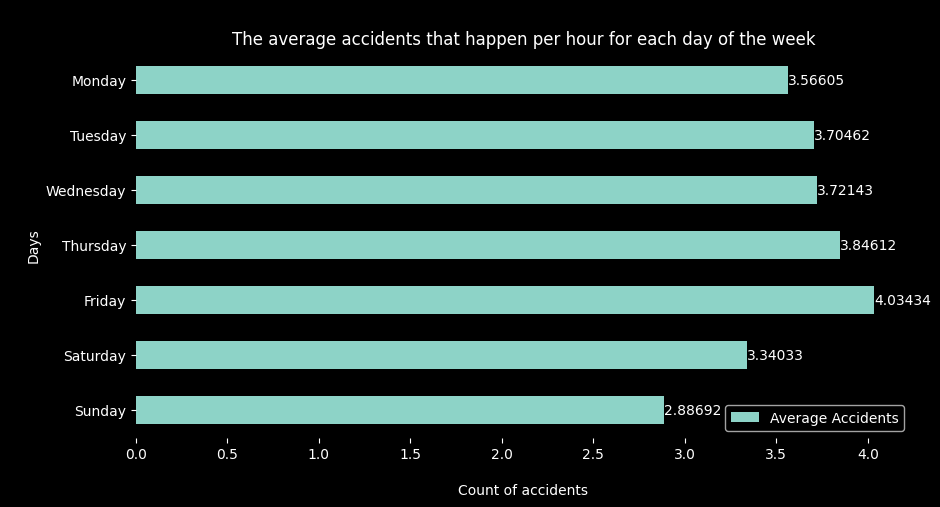

In [25]:
# Visulaizing average accidents per hour 
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
fig,ax = plt.subplots(figsize = (10,5))
hourtime.reindex(days).plot(kind = 'barh', ax = ax)
ax.set_title('\nThe average accidents that happen per hour for each day of the week')
ax.set(ylabel='\nDays', xlabel = '\nCount of accidents')
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars)

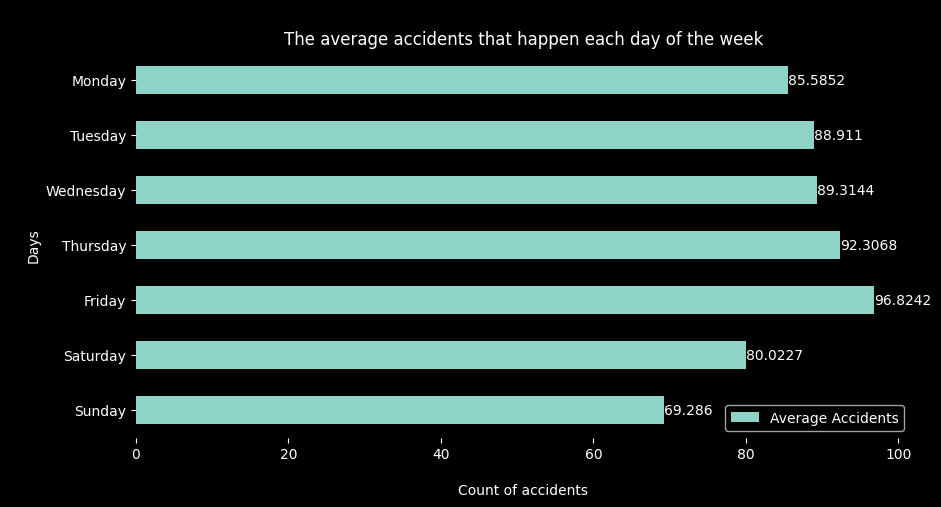

In [26]:
# Visualizing average accidents per day of the week
fig,ax = plt.subplots(figsize = (10,5))
Weekday.reindex(days).plot(kind = 'barh', ax = ax)
ax.set_title('\nThe average accidents that happen each day of the week')
ax.set(ylabel='\nDays', xlabel = '\nCount of accidents')
sns.despine(left=True, right=True, bottom=True, top=True)
for bars in ax.containers:
    ax.bar_label(bars)

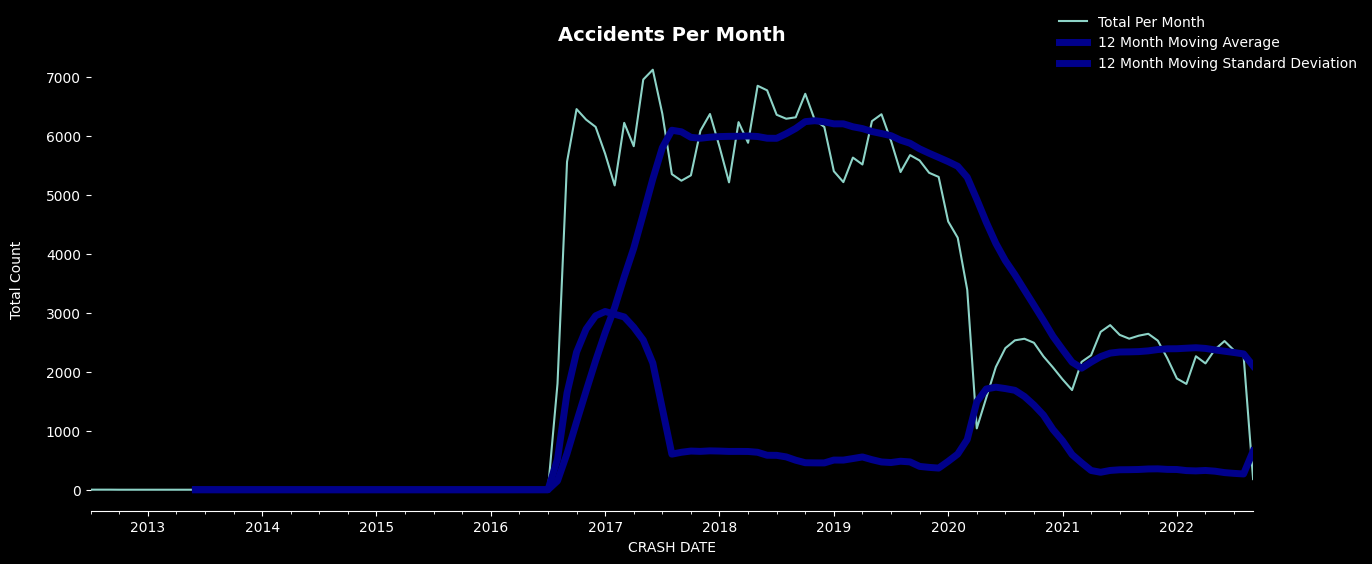

In [27]:
# Rolling
fig, ax = plt.subplots(figsize = (15, 6))
accidents.set_index('CRASH DATE').resample('M').size().plot(label = 'Total Per Month', ax = ax)
accidents.set_index('CRASH DATE').resample('M').size().rolling(window=12).mean().plot(color = 'darkblue', linewidth = 5, label = "12 Month Moving Average", ax = ax)
accidents.set_index('CRASH DATE').resample('M').size().rolling(window=12).std().plot(color = 'darkblue', linewidth = 5, label = "12 Month Moving Standard Deviation", ax = ax)
ax.set_title("Accidents Per Month", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

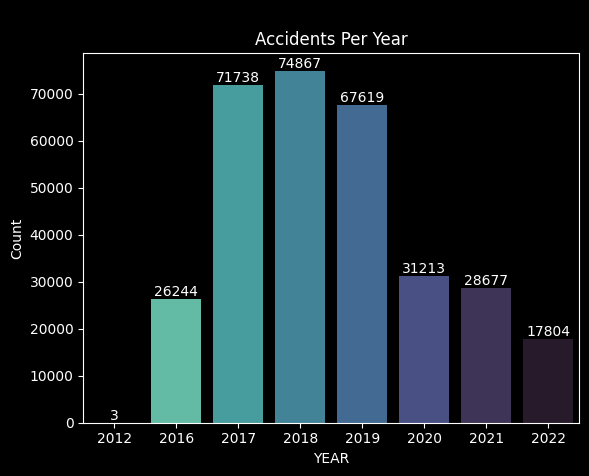

In [28]:
Year_dist = accidents['YEAR'].value_counts().reset_index()
Year_dist.rename(columns = {'index':'YEAR', 'YEAR':'Count'},inplace = True)
ax = sns.barplot(x = 'YEAR', y = 'Count', data = Year_dist, palette='mako_r')
plt.title('\nAccidents Per Year')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
all_year_accidents = accidents.groupby(['YEAR', 'DAY_OF_WEEK']).size()
all_year_accidents = all_year_accidents.rename_axis(['YEAR', 'DAY_OF_WEEK']).unstack('DAY_OF_WEEK')\
                                                                .reindex(columns = days)
all_year_accidents

DAY_OF_WEEK,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
YEAR,,,,,,,
2012,NaN,NaN,1.0,NaN,1.0,1.0,NaN
2016,2877.0,3539.0,4307.0,4044.0,3849.0,3868.0,3760.0
2017,8187.0,9275.0,11610.0,11229.0,10679.0,10538.0,10220.0
2018,8167.0,9795.0,11995.0,11700.0,11315.0,11135.0,10760.0
2019,7664.0,8786.0,10865.0,10219.0,9997.0,10301.0,9787.0
2020,3737.0,4349.0,5005.0,4673.0,4606.0,4511.0,4332.0
2021,3596.0,4039.0,4610.0,4280.0,4128.0,4111.0,3913.0
2022,2355.0,2549.0,2827.0,2593.0,2583.0,2480.0,2417.0


In [30]:
borough_dist = accidents.groupby('BOROUGH')['COLLISION_ID'].size().reset_index().sort_values('COLLISION_ID', ascending = False)
borough_dist.rename(columns = {'COLLISION_ID': 'Count'}, inplace = True)
borough_dist

,BOROUGH,Count
1,BROOKLYN,99400
3,QUEENS,95762
2,MANHATTAN,63618
0,BRONX,46867
4,STATEN ISLAND,12518


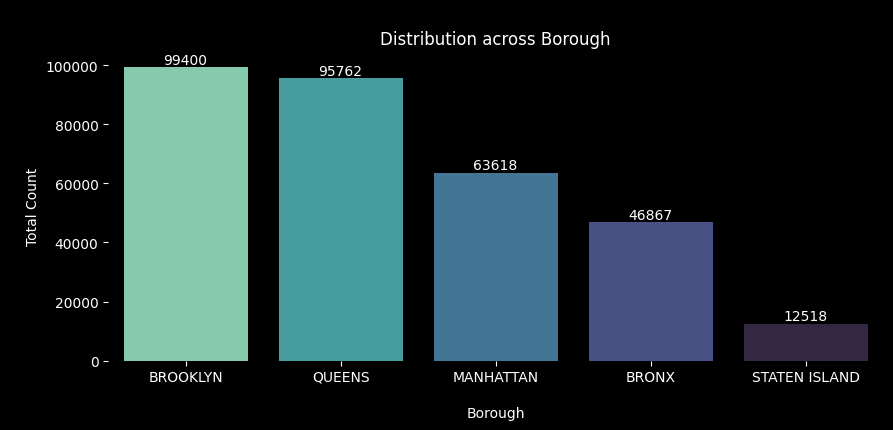

In [31]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.barplot(x = 'BOROUGH', y = 'Count', data = borough_dist, ax = ax, palette='mako_r')
ax.set_title('\nDistribution across Borough')
ax.set(xlabel='\nBorough', ylabel='\nTotal Count')
sns.despine(left=True, right=True, top=True, bottom=True)
for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
ped = accidents.groupby('BOROUGH')['PEDESTRIANS VICTIMS'].sum().reset_index().sort_values('PEDESTRIANS VICTIMS', ascending = False)
cyl = accidents.groupby('BOROUGH')['CYCLIST VICTIMS'].sum().reset_index().sort_values('CYCLIST VICTIMS', ascending = False)
motor = accidents.groupby('BOROUGH')['MOTORIST VICTIMS'].sum().reset_index().sort_values('MOTORIST VICTIMS', ascending = False)

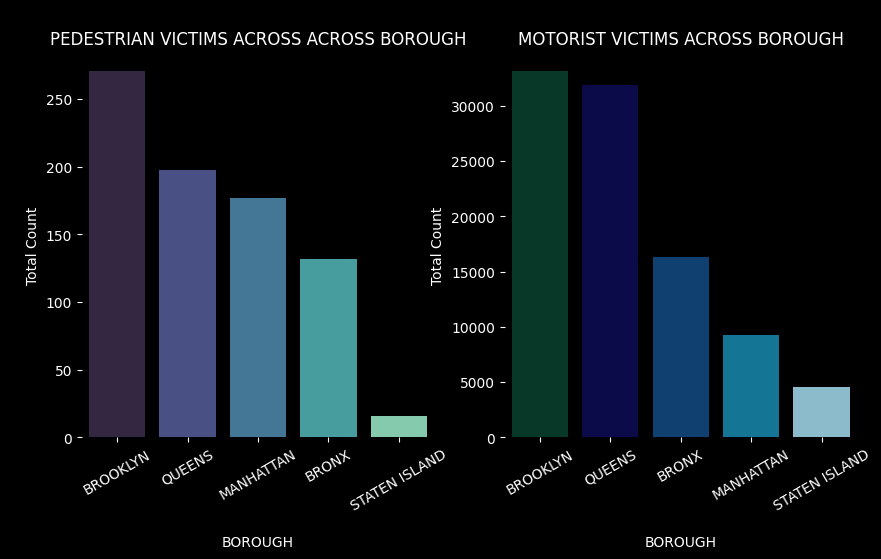

In [33]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.barplot(x = 'BOROUGH', y = 'PEDESTRIANS VICTIMS', data = ped, ax = ax[0], palette='mako')
sns.barplot(x = 'BOROUGH', y = 'MOTORIST VICTIMS', data = motor, ax = ax[1], palette='ocean')
ax[0].set_title('\nPEDESTRIAN VICTIMS ACROSS ACROSS BOROUGH')
ax[1].set_title('\nMOTORIST VICTIMS ACROSS BOROUGH')
ax[0].set(xlabel = '\nBOROUGH', ylabel='\nTotal Count')
ax[1].set(xlabel = '\nBOROUGH', ylabel='\nTotal Count')
ax[0].set_xticklabels(labels=ped['BOROUGH'],rotation=30)
ax[1].set_xticklabels(labels=motor['BOROUGH'],rotation=30)
sns.despine(left = True, right = True, top=True, bottom=True)


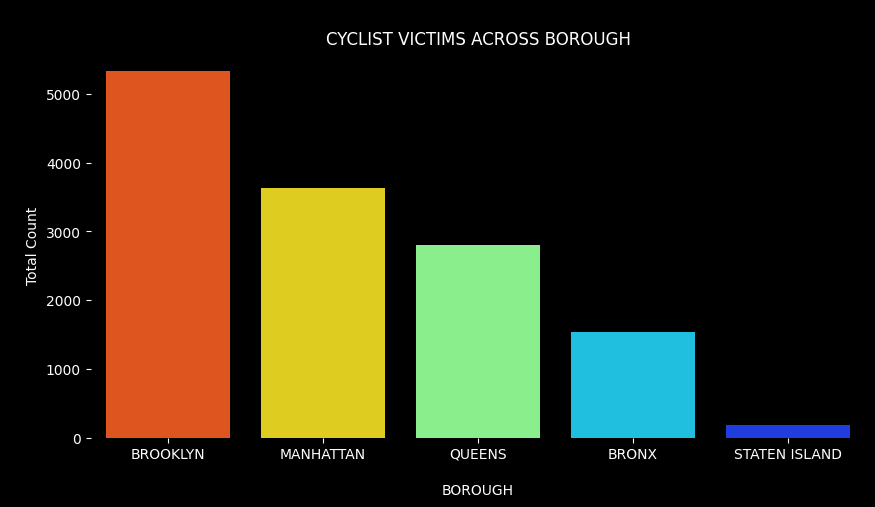

In [34]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'BOROUGH', y = 'CYCLIST VICTIMS', data = cyl, ax = ax, palette='jet_r')
ax.set_title('\nCYCLIST VICTIMS ACROSS BOROUGH')
ax.set(xlabel = '\nBOROUGH', ylabel='\nTotal Count')
sns.despine(left = True, right = True, top=True, bottom=True)

In [35]:
motorist_injured = accidents['NUMBER OF MOTORIST INJURED'].sum()
motorist_killed = accidents['NUMBER OF MOTORIST KILLED'].sum()
cyclist_injured = accidents['NUMBER OF CYCLIST INJURED'].sum()
cyclist_killed = accidents['NUMBER OF CYCLIST KILLED'].sum()
pedestrian_injured = accidents['NUMBER OF PEDESTRIANS INJURED'].sum()
pedestrian_killed = accidents['NUMBER OF PEDESTRIANS KILLED'].sum()
all_injured = [['motorist',motorist_injured],['cyclist',cyclist_injured], ['pedestrian',pedestrian_injured]]
all_injured = pd.DataFrame(all_injured, columns = ['victims', 'Count'])
all_killed = [['motorist', motorist_killed], ['cyclist', cyclist_injured], ['pedestrian', pedestrian_killed]]
all_killed = pd.DataFrame(all_killed, columns = ['Victims', 'Count'])

In [36]:
all_injured

,victims,Count
0,motorist,94953
1,cyclist,13404
2,pedestrian,749


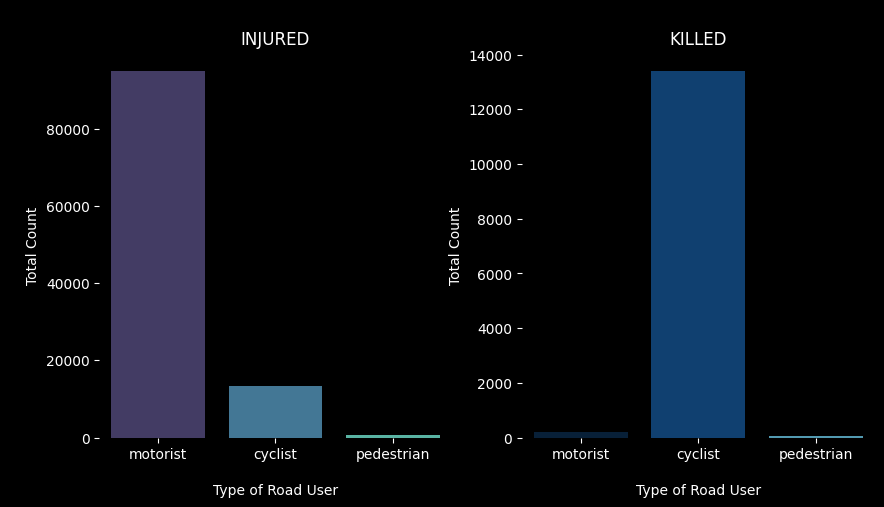

In [37]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.barplot(x = 'victims', y = 'Count', data = all_injured, ax = ax[0], palette='mako')
sns.barplot(x = 'Victims', y = 'Count', data = all_killed, ax = ax[1], palette='ocean')
ax[0].set_title('\nINJURED')
ax[1].set_title('\nKILLED')
ax[0].set(xlabel = '\nType of Road User', ylabel='\nTotal Count')
ax[1].set(xlabel = '\nType of Road User', ylabel='\nTotal Count')
# ax[0].set_xticklabels(labels=ped['BOROUGH'],rotation=30)
# ax[1].set_xticklabels(labels=motor['BOROUGH'],rotation=30)
sns.despine(left = True, right = True, top=True, bottom=True)

[Text(0.5, 0, '\nBOROUGH'), Text(0, 0.5, '\nTotal Count')]

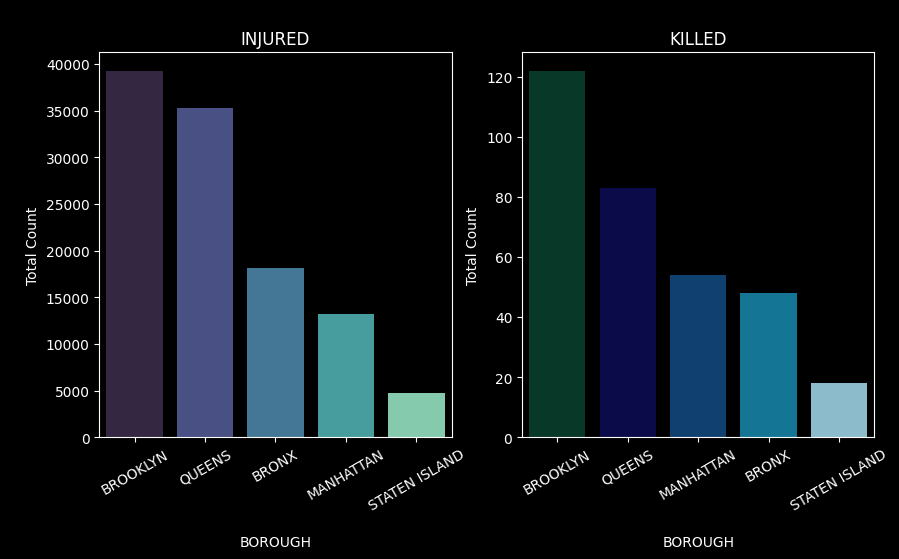

In [38]:
borough_dist_injured = accidents.groupby('BOROUGH')['NUMBER OF PERSONS INJURED'].sum().reset_index().sort_values('NUMBER OF PERSONS INJURED', ascending = False)
borough_dist_killed = accidents.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].sum().reset_index().sort_values('NUMBER OF PERSONS KILLED', ascending = False)
borough_dist_injured.rename(columns ={'NUMBER OF PERSONS INJURED': 'Count'}, inplace = True)
borough_dist_killed.rename(columns = {'NUMBER OF PERSONS KILLED': 'Count'}, inplace = True)
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.barplot(x = 'BOROUGH', y = 'Count', data = borough_dist_injured, ax = ax[0], palette='mako')
sns.barplot(x = 'BOROUGH', y = 'Count', data = borough_dist_killed, ax = ax[1], palette='ocean')
ax[0].set_title('\nINJURED')
ax[1].set_title('\nKILLED')
ax[0].set_xticklabels(labels=borough_dist_injured['BOROUGH'],rotation=30)
ax[1].set_xticklabels(labels=borough_dist_killed['BOROUGH'],rotation=30)
ax[0].set(xlabel = '\nBOROUGH', ylabel='\nTotal Count')
ax[1].set(xlabel = '\nBOROUGH', ylabel='\nTotal Count')

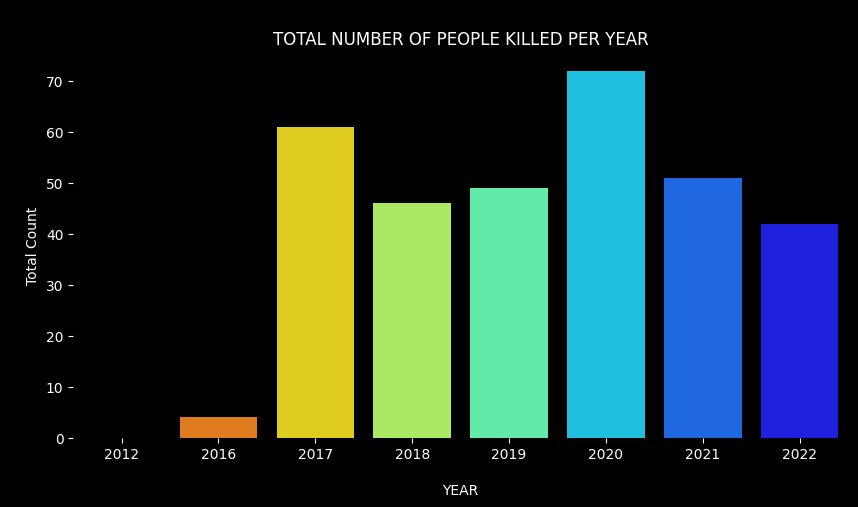

In [39]:
year_killed = accidents.groupby('YEAR')['NUMBER OF PERSONS KILLED'].sum().reset_index()
year_killed 
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'YEAR', y = 'NUMBER OF PERSONS KILLED', data = year_killed, ax = ax, palette='jet_r')
ax.set_title('\nTOTAL NUMBER OF PEOPLE KILLED PER YEAR')
ax.set(xlabel = '\nYEAR', ylabel='\nTotal Count')
sns.despine(left = True, right = True, top=True, bottom=True)

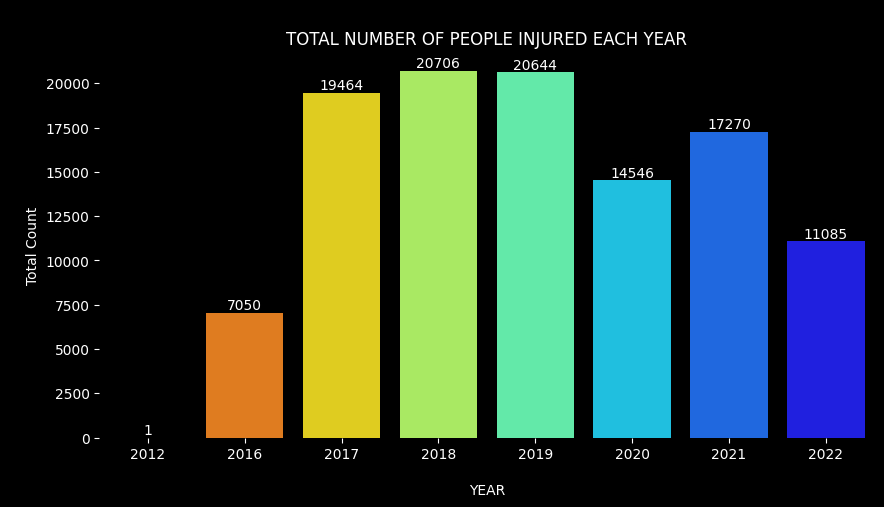

In [40]:
year_injured = accidents.groupby('YEAR')['NUMBER OF PERSONS INJURED'].sum().reset_index()
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'YEAR', y = 'NUMBER OF PERSONS INJURED', data = year_injured, ax = ax, palette='jet_r')
ax.set_title('\nTOTAL NUMBER OF PEOPLE INJURED EACH YEAR')
ax.set(xlabel = '\nYEAR', ylabel='\nTotal Count')
sns.despine(left = True, right = True, top=True, bottom=True)
for bars in ax.containers:
    ax.bar_label(bars)

In [41]:
accidents_by_month = accidents.groupby(['BOROUGH', 'MONTH']).size().reset_index()
accidents_by_month.rename(columns={0:'Count'}, inplace=True)
accidents_by_month

,BOROUGH,MONTH,Count
0,BRONX,April,3431
1,BRONX,August,3998
2,BRONX,December,3919
3,BRONX,February,3366
4,BRONX,January,3689
5,BRONX,July,3933
6,BRONX,June,4249
7,BRONX,March,3900
8,BRONX,May,4059
9,BRONX,November,4068


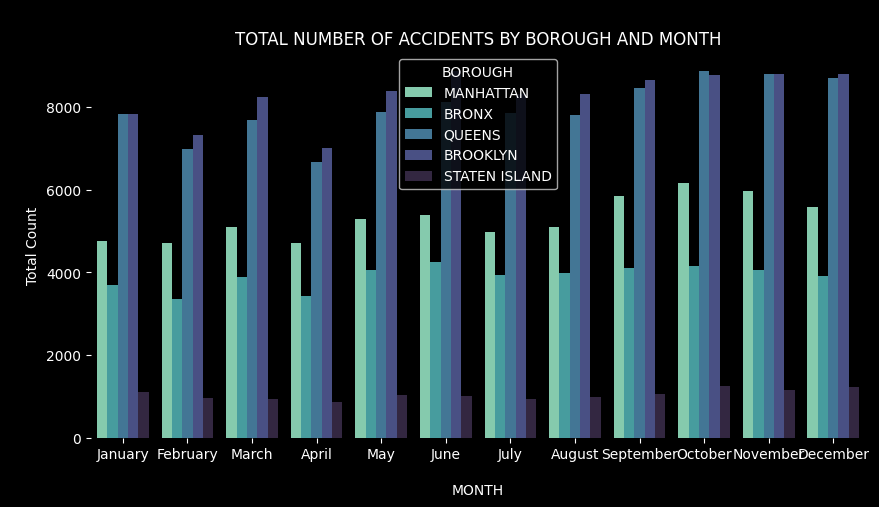

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
accidents_by_month.index=pd.CategoricalIndex(accidents_by_month['MONTH'],categories=months,ordered=True)
accidents_by_month=accidents_by_month.sort_index().reset_index(drop=True)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'MONTH', y = 'Count', hue = 'BOROUGH', palette='mako_r', data=accidents_by_month)
ax.set_title('\nTOTAL NUMBER OF ACCIDENTS BY BOROUGH AND MONTH')
ax.set(xlabel = '\nMONTH', ylabel='\nTotal Count')
sns.despine(left = True, right = True, top=True, bottom=True)

In [43]:
accidents_by_year = accidents.groupby(['BOROUGH', 'YEAR']).size().reset_index()
accidents_by_year.rename(columns={0:'Count'}, inplace=True)
accidents_by_year

,BOROUGH,YEAR,Count
0,BRONX,2016,3353
1,BRONX,2017,10126
2,BRONX,2018,10734
3,BRONX,2019,9653
4,BRONX,2020,5439
5,BRONX,2021,4630
6,BRONX,2022,2932
7,BROOKLYN,2012,2
8,BROOKLYN,2016,7918
9,BROOKLYN,2017,22235


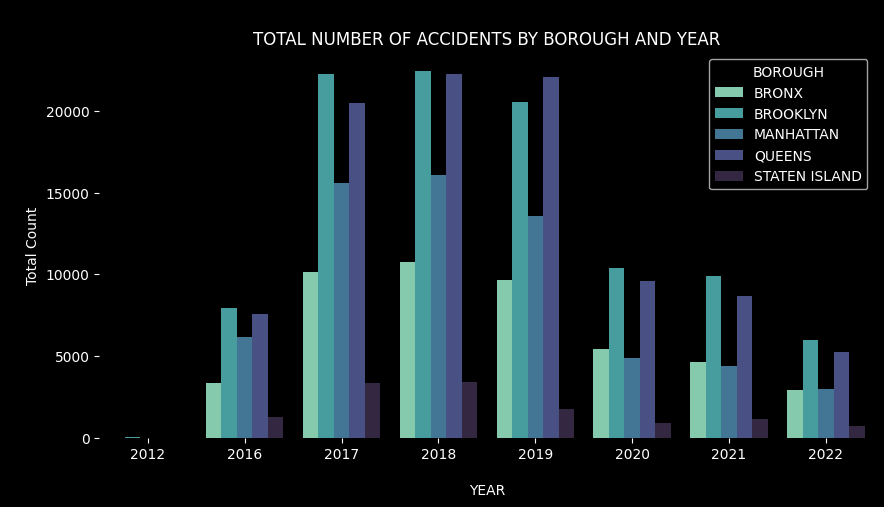

In [44]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'YEAR', y = 'Count', hue = 'BOROUGH', palette='mako_r', data=accidents_by_year)
ax.set_title('\nTOTAL NUMBER OF ACCIDENTS BY BOROUGH AND YEAR')
ax.set(xlabel = '\nYEAR', ylabel='\nTotal Count')
sns.despine(left = True, right = True, top=True, bottom=True)

In [45]:
accidents_by_day = accidents.groupby(['BOROUGH', 'DAY_OF_WEEK']).size().reset_index()
accidents_by_day.rename(columns={0:'Count'}, inplace=True)
accidents_by_day

,BOROUGH,DAY_OF_WEEK,Count
0,BRONX,Friday,7724
1,BRONX,Monday,6756
2,BRONX,Saturday,6343
3,BRONX,Sunday,5240
4,BRONX,Thursday,7016
5,BRONX,Tuesday,6905
6,BRONX,Wednesday,6883
7,BROOKLYN,Friday,15783
8,BROOKLYN,Monday,14398
9,BROOKLYN,Saturday,12757


In [46]:
accidents_by_day.index=pd.CategoricalIndex(accidents_by_day['DAY_OF_WEEK'],categories=days,ordered=True)
accidents_by_day=accidents_by_day.sort_index().reset_index(drop=True)

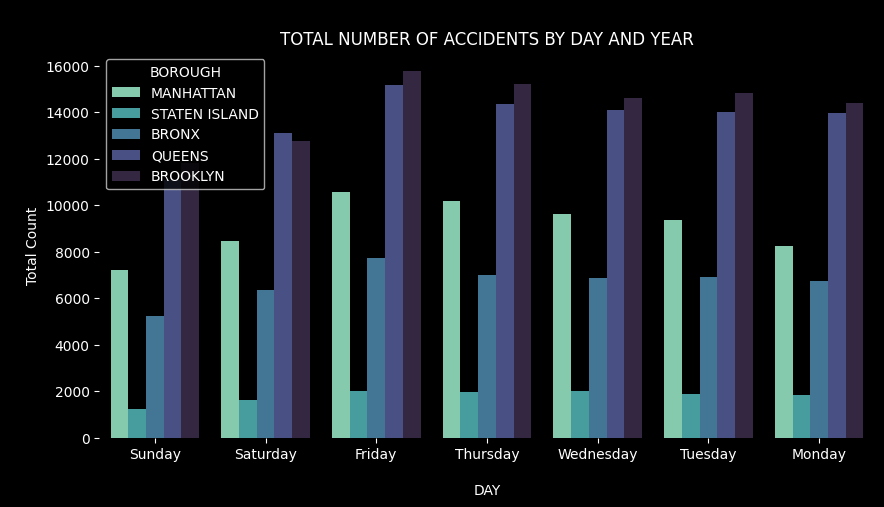

In [47]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = 'DAY_OF_WEEK', y = 'Count', hue = 'BOROUGH', palette='mako_r', data=accidents_by_day)
ax.set_title('\nTOTAL NUMBER OF ACCIDENTS BY DAY AND YEAR')
ax.set(xlabel = '\nDAY', ylabel='\nTotal Count')
sns.despine(left = True, right = True, top=True, bottom=True)

In [48]:
contr_factor_1 = accidents['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().reset_index()
contr_factor_1.rename(columns = {'index':'Contributing Factor 1', 'CONTRIBUTING FACTOR VEHICLE 1':'Count'}, inplace =True)
contr_factor_1

,Contributing Factor 1,Count
0,Driver Inattention/Distraction,83564
1,Unspecified,57725
2,Failure to Yield Right-of-Way,30468
3,Following Too Closely,26002
4,Passing or Lane Usage Improper,15934
5,Traffic Control Disregarded,11761
6,Passing Too Closely,11745
7,Backing Unsafely,11494
8,Turning Improperly,11000
9,Unsafe Lane Changing,10029


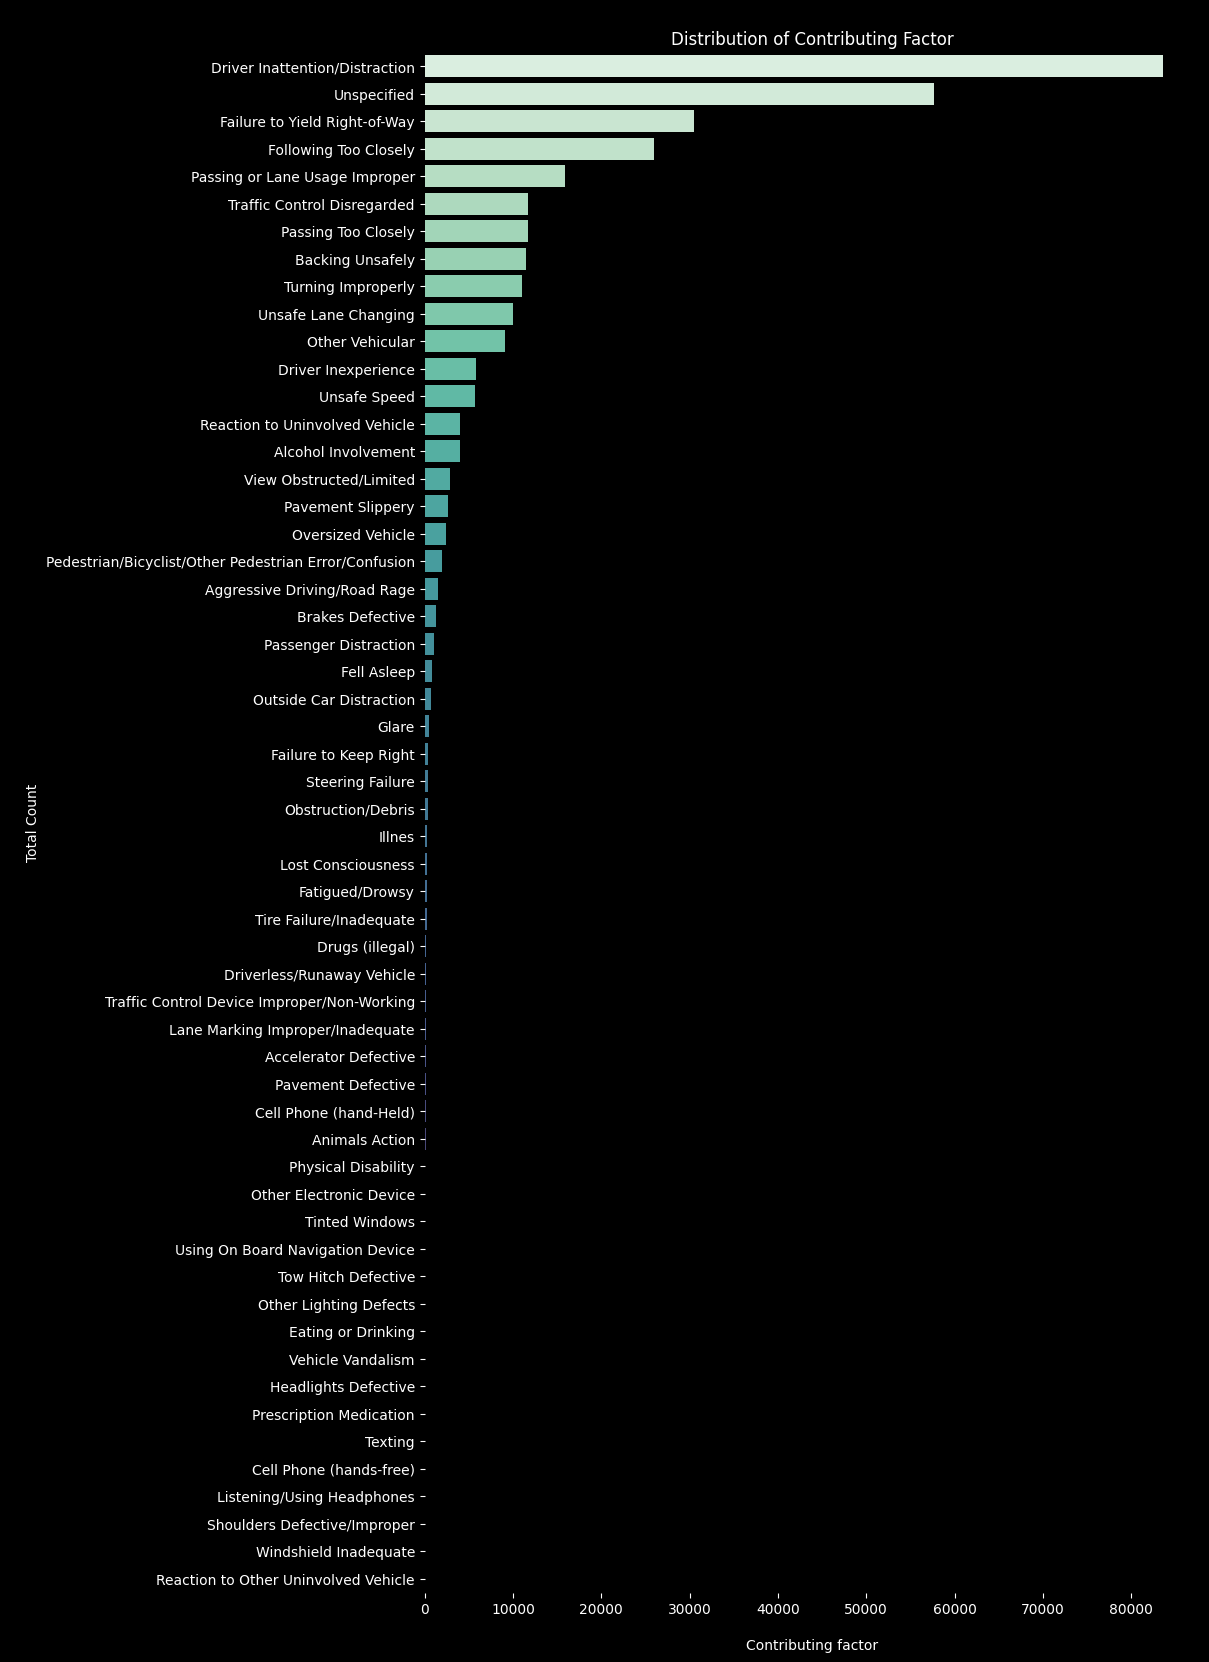

In [49]:
fig, ax = plt.subplots(figsize = (10, 20))
sns.barplot(y = 'Contributing Factor 1', x = 'Count', data = contr_factor_1, ax = ax, palette='mako_r')
ax.set_title('\nDistribution of Contributing Factor')
ax.set(xlabel='\nContributing factor', ylabel='\nTotal Count')
sns.despine(left=True, right=True, top=True, bottom=True)


In [50]:
cont_factor = list(contr_factor_1['Contributing Factor 1'])
cont_factor

['Driver Inattention/Distraction',
 'Unspecified',
 'Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Passing or Lane Usage Improper',
 'Traffic Control Disregarded',
 'Passing Too Closely',
 'Backing Unsafely',
 'Turning Improperly',
 'Unsafe Lane Changing',
 'Other Vehicular',
 'Driver Inexperience',
 'Unsafe Speed',
 'Reaction to Uninvolved Vehicle',
 'Alcohol Involvement',
 'View Obstructed/Limited',
 'Pavement Slippery',
 'Oversized Vehicle',
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
 'Aggressive Driving/Road Rage',
 'Brakes Defective',
 'Passenger Distraction',
 'Fell Asleep',
 'Outside Car Distraction',
 'Glare',
 'Failure to Keep Right',
 'Steering Failure',
 'Obstruction/Debris',
 'Illnes',
 'Lost Consciousness',
 'Fatigued/Drowsy',
 'Tire Failure/Inadequate',
 'Drugs (illegal)',
 'Driverless/Runaway Vehicle',
 'Traffic Control Device Improper/Non-Working',
 'Lane Marking Improper/Inadequate',
 'Accelerator Defective',
 'Pavement Defective',
 'Cell P

In [51]:
contr_factor_Year = accidents.groupby(['YEAR', 'CONTRIBUTING FACTOR VEHICLE 1']).size()
contr_factor_Year

YEAR  CONTRIBUTING FACTOR VEHICLE 1   
2012  Failure to Yield Right-of-Way          1
      Prescription Medication                1
      Unspecified                            1
2016  Accelerator Defective                 11
      Aggressive Driving/Road Rage          99
                                          ... 
2022  Unsafe Speed                         593
      Unspecified                         2984
      Using On Board Navigation Device       2
      Vehicle Vandalism                      2
      View Obstructed/Limited              214
Length: 373, dtype: int64

In [52]:
contr_factor_Year = contr_factor_Year.rename_axis(['YEAR', 'CONTRIBUTING FACTOR VEHICLE 1'])\
    .unstack('CONTRIBUTING FACTOR VEHICLE 1').reindex(columns = cont_factor)
contr_factor_Year

CONTRIBUTING FACTOR VEHICLE 1,Driver Inattention/Distraction,Unspecified,Failure to Yield Right-of-Way,Following Too Closely,Passing or Lane Usage Improper,Traffic Control Disregarded,Passing Too Closely,Backing Unsafely,Turning Improperly,Unsafe Lane Changing,...,Eating or Drinking,Vehicle Vandalism,Headlights Defective,Prescription Medication,Texting,Cell Phone (hands-free),Listening/Using Headphones,Shoulders Defective/Improper,Windshield Inadequate,Reaction to Other Uninvolved Vehicle
YEAR,,,,,,,,,,,,,,,,,,,,,
2012,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2016,6731.0,5076.0,2317.0,2122.0,1244.0,807.0,981.0,1060.0,949.0,975.0,...,2.0,4.0,2.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0
2017,17265.0,12814.0,6804.0,6454.0,3600.0,2521.0,2790.0,2938.0,2772.0,2774.0,...,12.0,3.0,5.0,8.0,1.0,3.0,2.0,NaN,1.0,NaN
2018,19574.0,13004.0,7171.0,6817.0,3938.0,2329.0,3014.0,3009.0,2708.0,2787.0,...,7.0,8.0,5.0,6.0,4.0,4.0,2.0,1.0,1.0,NaN
2019,19110.0,12556.0,6449.0,5831.0,3415.0,1939.0,2545.0,2456.0,2136.0,2022.0,...,4.0,7.0,3.0,1.0,2.0,NaN,2.0,1.0,NaN,NaN
2020,8716.0,6117.0,3041.0,1973.0,1355.0,1393.0,1004.0,938.0,899.0,632.0,...,4.0,3.0,7.0,2.0,NaN,1.0,NaN,3.0,1.0,NaN
2021,7407.0,5173.0,2912.0,1676.0,1442.0,1738.0,863.0,706.0,875.0,505.0,...,1.0,3.0,4.0,4.0,5.0,2.0,NaN,1.0,NaN,NaN
2022,4761.0,2984.0,1773.0,1129.0,940.0,1034.0,548.0,387.0,661.0,334.0,...,3.0,2.0,2.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN


In [53]:
vehicle = accidents.groupby('VEHICLE TYPE CODE 1')['COLLISION_ID'].size().reset_index().sort_values('COLLISION_ID', ascending = False)
vehicle.rename(columns={'COLLISION_ID':'Count'}, inplace=True)
vehicle

,VEHICLE TYPE CODE 1,Count
357,Sedan,151570
367,Station Wagon/Sport Utility Vehicle,110352
397,Taxi,15337
295,Pick-up Truck,8930
53,Box Truck,6446
...,...,...
231,Mini Van,1
230,MTA bus,1
227,MOTOR SCOO,1
226,MOTOR HOME,1


In [54]:
indexAge = vehicle[ (vehicle['Count'] <= 20) ].index
vehicle.drop(indexAge , inplace=True)
vehicle

,VEHICLE TYPE CODE 1,Count
357,Sedan,151570
367,Station Wagon/Sport Utility Vehicle,110352
397,Taxi,15337
295,Pick-up Truck,8930
53,Box Truck,6446
57,Bus,6415
51,Bike,2787
450,Van,2405
405,Tractor Truck Diesel,2101
239,Motorcycle,1492


In [55]:
vehicle_list = list(vehicle['VEHICLE TYPE CODE 1'])
vehicle_list

['Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'Taxi',
 'Pick-up Truck',
 'Box Truck',
 'Bus',
 'Bike',
 'Van',
 'Tractor Truck Diesel',
 'Motorcycle',
 'Ambulance',
 'Dump',
 'Convertible',
 'PK',
 'Carry All',
 'Garbage or Refuse',
 'Flat Bed',
 'E-Bike',
 'Tractor Truck Gasoline',
 'Tow Truck / Wrecker',
 'E-Scooter',
 'Moped',
 'Tanker',
 'Chassis Cab',
 'Concrete Mixer',
 'Refrigerated Van',
 'Motorscooter',
 'FIRE TRUCK',
 'Flat Rack',
 'Armored Truck',
 'Motorbike',
 'Trailer',
 'Beverage Truck',
 'TRUCK',
 'School Bus',
 'Lift Boom',
 'Limosine',
 'Stake or Rack',
 'Snow Plow',
 'FDNY']

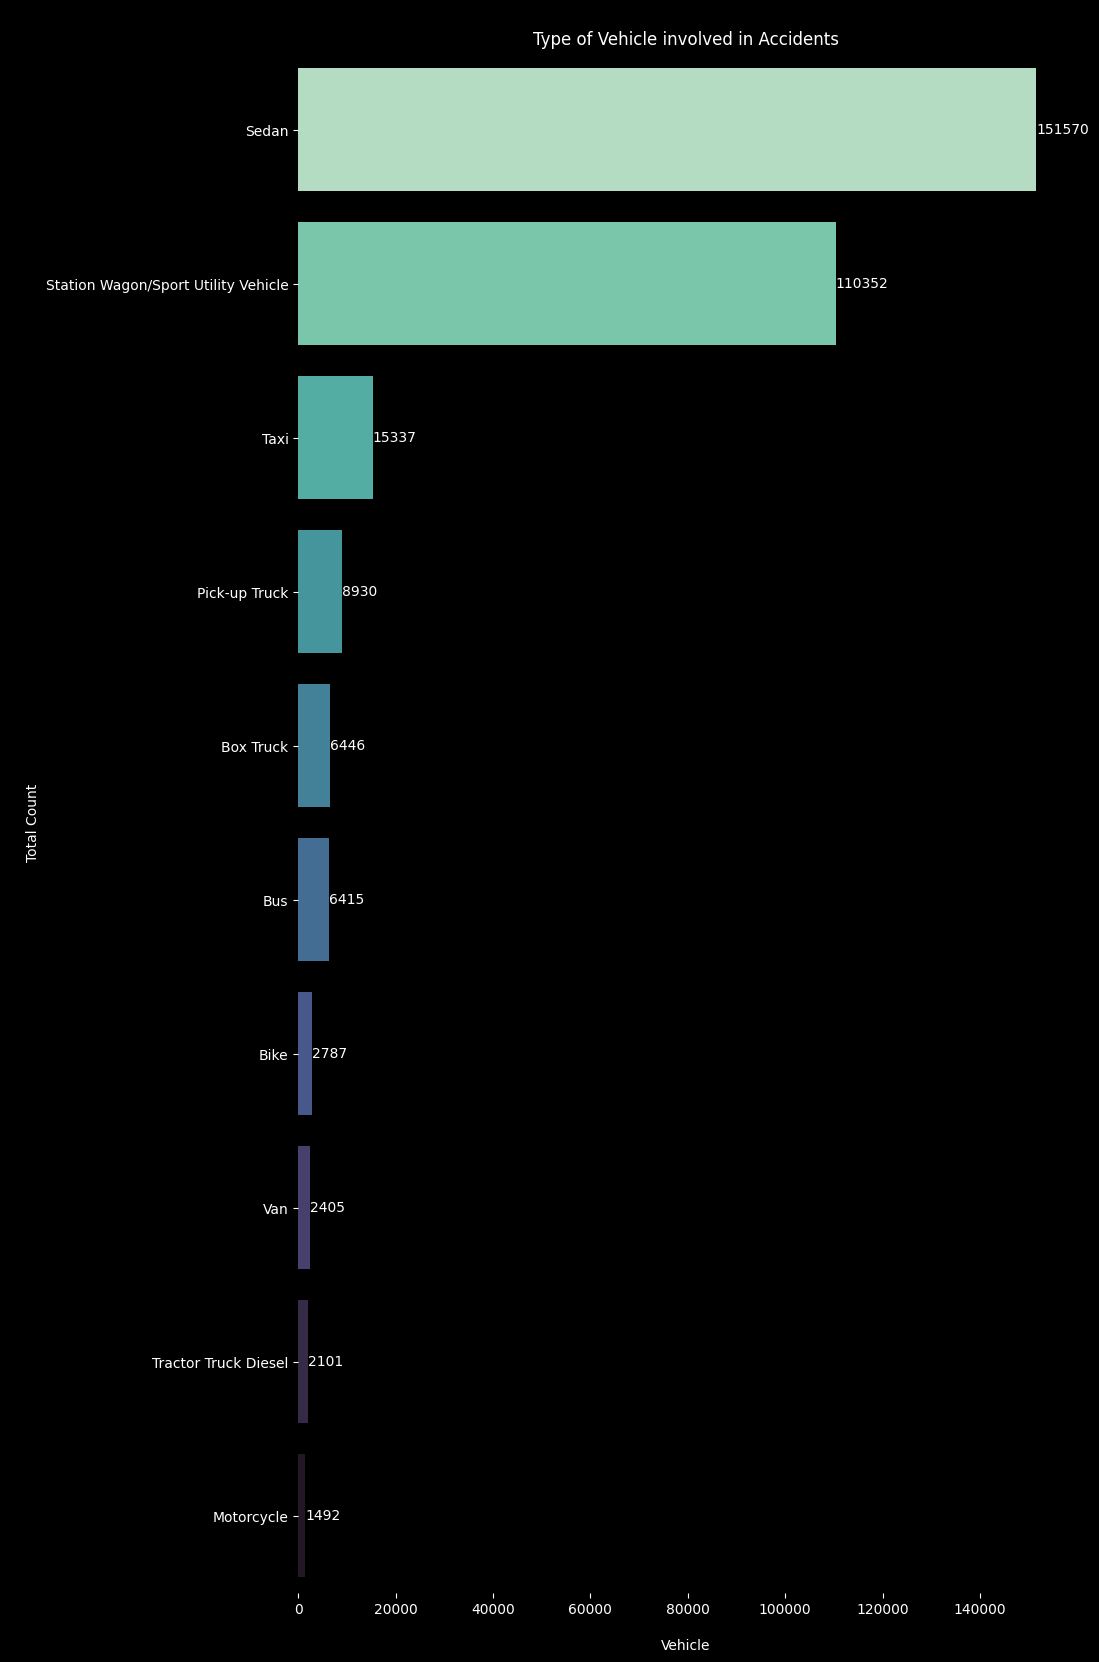

In [56]:
fig, ax = plt.subplots(figsize = (10, 20))
sns.barplot(y = 'VEHICLE TYPE CODE 1', x = 'Count', data = vehicle.head(10), ax = ax, palette='mako_r')
ax.set_title('\nType of Vehicle involved in Accidents')
ax.set(xlabel='\nVehicle', ylabel='\nTotal Count')
sns.despine(left=True, right=True, top=True, bottom=True)
for bars in ax.containers:
    ax.bar_label(bars)

In [57]:
vehicle_by_year = accidents.groupby(['YEAR', 'VEHICLE TYPE CODE 1']).size()
vehicle_by_year

YEAR  VEHICLE TYPE CODE 1                
2012  Station Wagon/Sport Utility Vehicle    3
2016  2 WHE                                  1
      2 dr sedan                             1
      26 ft                                  1
      4DR                                    1
                                            ..
2022  fork lift                              1
      garbage tr                             1
      house on w                             1
      moped                                  1
      trailer                                1
Length: 1180, dtype: int64

In [58]:
vehicle_by_year = vehicle_by_year.rename_axis(['YEAR', 'VEHICLE TYPE CODE 1'])\
    .unstack('VEHICLE TYPE CODE 1').reindex(columns = vehicle_list)
vehicle_by_year

VEHICLE TYPE CODE 1,Sedan,Station Wagon/Sport Utility Vehicle,Taxi,Pick-up Truck,Box Truck,Bus,Bike,Van,Tractor Truck Diesel,Motorcycle,...,Motorbike,Trailer,Beverage Truck,TRUCK,School Bus,Lift Boom,Limosine,Stake or Rack,Snow Plow,FDNY
YEAR,,,,,,,,,,,,,,,,,,,,,
2012,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,13629.0,8065.0,1353.0,715.0,468.0,509.0,143.0,304.0,174.0,96.0,...,4.0,4.0,8.0,4.0,6.0,7.0,NaN,6.0,2.0,NaN
2017,35827.0,23227.0,3631.0,2134.0,1399.0,1444.0,599.0,596.0,477.0,320.0,...,15.0,26.0,18.0,20.0,23.0,11.0,NaN,11.0,9.0,8.0
2018,34786.0,26067.0,4295.0,2334.0,1676.0,1462.0,799.0,574.0,493.0,300.0,...,10.0,31.0,23.0,28.0,6.0,8.0,1.0,8.0,8.0,8.0
2019,30547.0,25440.0,3463.0,2049.0,1428.0,1382.0,353.0,442.0,418.0,265.0,...,11.0,16.0,17.0,10.0,12.0,19.0,17.0,9.0,4.0,8.0
2020,14651.0,11347.0,1230.0,758.0,622.0,529.0,314.0,194.0,212.0,169.0,...,22.0,1.0,7.0,3.0,9.0,4.0,9.0,2.0,2.0,3.0
2021,13683.0,10049.0,804.0,582.0,531.0,642.0,338.0,207.0,192.0,208.0,...,14.0,4.0,6.0,3.0,8.0,11.0,12.0,5.0,3.0,2.0
2022,8447.0,6154.0,561.0,358.0,322.0,447.0,241.0,88.0,135.0,134.0,...,11.0,1.0,2.0,1.0,1.0,4.0,5.0,NaN,6.0,1.0


In [59]:
# Motorist killed and injured across the years
motorist_injured_year = accidents.groupby('YEAR')['NUMBER OF MOTORIST INJURED'].sum().reset_index()
motorist_killed_year = accidents.groupby('YEAR')['NUMBER OF MOTORIST KILLED'].sum().reset_index()

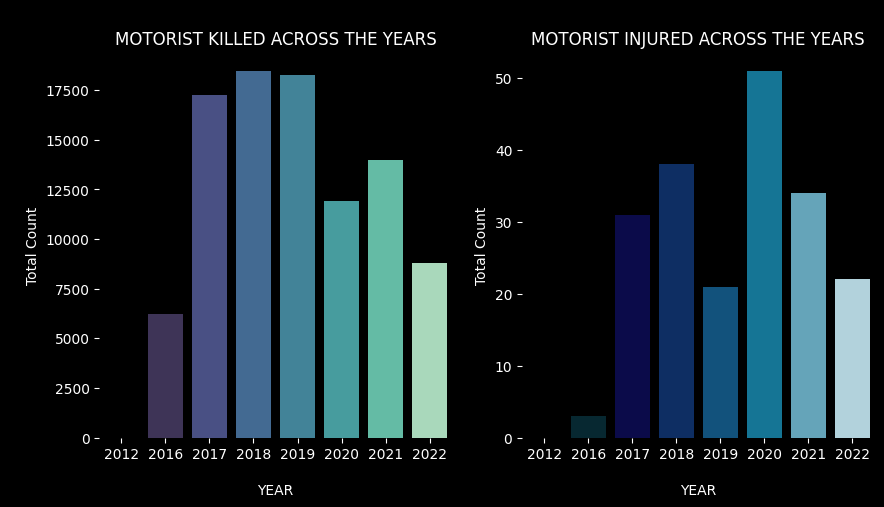

In [60]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.barplot(x = 'YEAR', y = 'NUMBER OF MOTORIST INJURED', data = motorist_injured_year, ax = ax[0], palette='mako')
sns.barplot(x = 'YEAR', y = 'NUMBER OF MOTORIST KILLED', data = motorist_killed_year, ax = ax[1], palette='ocean')
ax[0].set_title('\nMOTORIST KILLED ACROSS THE YEARS')
ax[1].set_title('\nMOTORIST INJURED ACROSS THE YEARS')
ax[0].set(xlabel = '\nYEAR', ylabel='\nTotal Count')
ax[1].set(xlabel = '\nYEAR', ylabel='\nTotal Count')
# ax[0].set_xticklabels(labels=ped['BORO'],rotation=30)
# ax[1].set_xticklabels(labels=motor['BOROUGH'],rotation=30)
sns.despine(left = True, right = True, top=True, bottom=True)

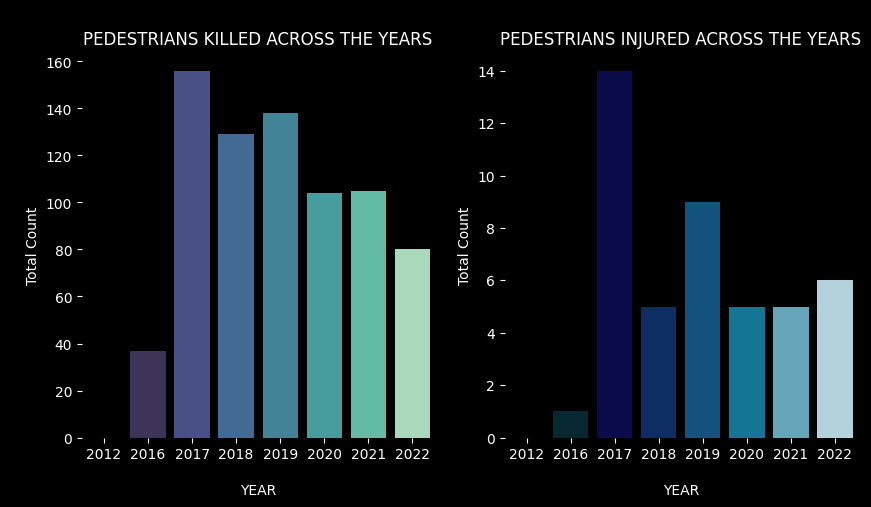

In [61]:
# Pedestrian killed and injured across the years
pedestrian_injured_year = accidents.groupby('YEAR')['NUMBER OF PEDESTRIANS INJURED'].sum().reset_index()
pedestrian_killed_year = accidents.groupby('YEAR')['NUMBER OF PEDESTRIANS KILLED'].sum().reset_index()

fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.barplot(x = 'YEAR', y = 'NUMBER OF PEDESTRIANS INJURED', data = pedestrian_injured_year, ax = ax[0], palette='mako')
sns.barplot(x = 'YEAR', y = 'NUMBER OF PEDESTRIANS KILLED', data = pedestrian_killed_year, ax = ax[1], palette='ocean')
ax[0].set_title('\nPEDESTRIANS KILLED ACROSS THE YEARS')
ax[1].set_title('\nPEDESTRIANS INJURED ACROSS THE YEARS')
ax[0].set(xlabel = '\nYEAR', ylabel='\nTotal Count')
ax[1].set(xlabel = '\nYEAR', ylabel='\nTotal Count')
# ax[0].set_xticklabels(labels=ped['BORO'],rotation=30)
# ax[1].set_xticklabels(labels=motor['BOROUGH'],rotation=30)
sns.despine(left = True, right = True, top=True, bottom=True)

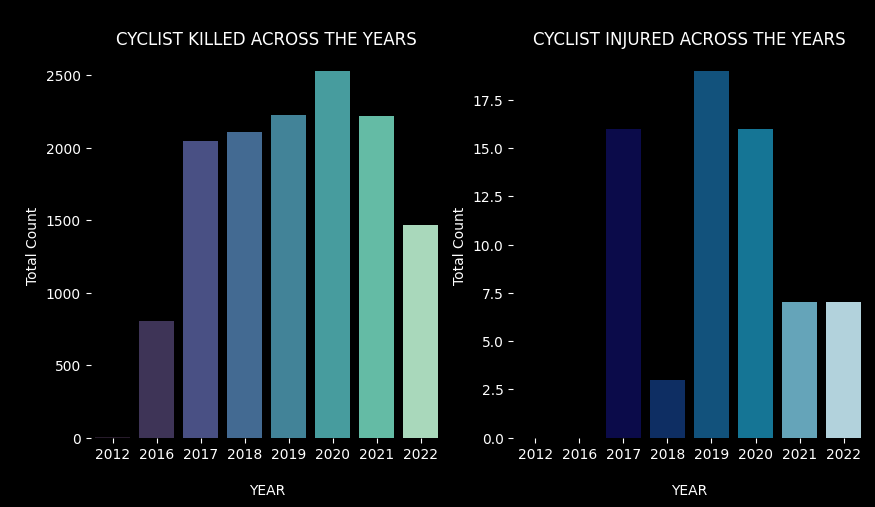

In [62]:
cyclist_injured_year = accidents.groupby('YEAR')['NUMBER OF CYCLIST INJURED'].sum().reset_index()
cyclist_killed_year = accidents.groupby('YEAR')['NUMBER OF CYCLIST KILLED'].sum().reset_index()

fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.barplot(x = 'YEAR', y = 'NUMBER OF CYCLIST INJURED', data = cyclist_injured_year, ax = ax[0], palette='mako')
sns.barplot(x = 'YEAR', y = 'NUMBER OF CYCLIST KILLED', data = cyclist_killed_year, ax = ax[1], palette='ocean')
ax[0].set_title('\nCYCLIST KILLED ACROSS THE YEARS')
ax[1].set_title('\nCYCLIST INJURED ACROSS THE YEARS')
ax[0].set(xlabel = '\nYEAR', ylabel='\nTotal Count')
ax[1].set(xlabel = '\nYEAR', ylabel='\nTotal Count')
sns.despine(top=True, bottom=True, left=True, right=True)

In [63]:
contr_factor_2 = accidents['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().reset_index()
contr_factor_2.rename(columns = {'index':'Contributing Factor 2', 'CONTRIBUTING FACTOR VEHICLE 2':'Count'}, inplace =True)
contr_factor_2

,Contributing Factor 2,Count
0,Unspecified,258950
1,Driver Inattention/Distraction,24038
2,Other Vehicular,5098
3,Failure to Yield Right-of-Way,4439
4,Following Too Closely,4001
5,Passing or Lane Usage Improper,3981
6,Passing Too Closely,2786
7,Traffic Control Disregarded,2292
8,Unsafe Lane Changing,1880
9,Unsafe Speed,1654


In [ ]:
mapping = (accidents.query('CONTRIBUTING FACTOR VEHICLE 1' != 'Unspecified').drop_duplicates('COLLISION_ID').set_index('COLLISION_ID').CON)